In [7]:
import plotly.express as px
import yfinance as yf
import time

Price Metrics

In [8]:
def get_current_price(ticker):
    ticker = ticker
    ticker_data = yf.Ticker(ticker)
    price = ticker_data.history(period="1d")['Close'].iloc[-1]
    return price

def track_current_price(ticker, interval = 5):
    while True:
        try: 
            price = get_current_price(ticker)
            print(price)
        except Exception as e:
            print(e)
            time.sleep(interval)            

In [9]:
def close_price(ticker):
    ticker = ticker
    ticker_data = yf.Ticker(ticker).history(period='max')
    # Create a line plot
    fig = px.line(ticker_data, x=ticker_data.index, y='Close', title=f'{ticker} Closing Prices', labels={'Close': 'Closing Price', 'Date': 'Date'})
    return fig.show()

# Print ticker data
print(close_price("NVDA"))

None


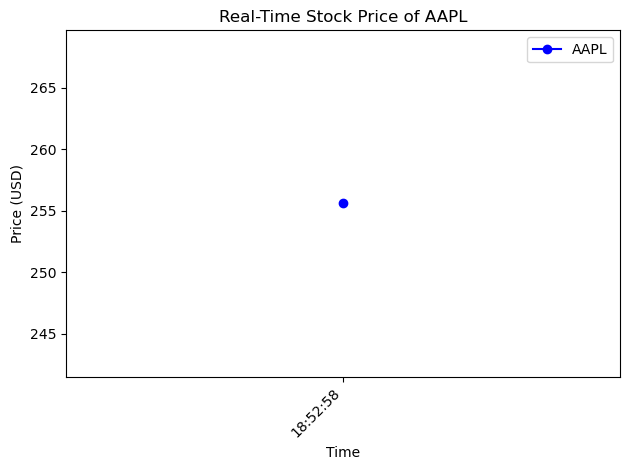

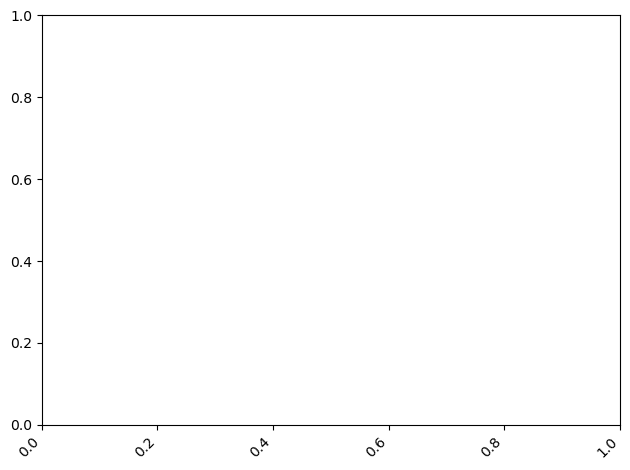

KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt

def plot_real_time_prices(ticker, duration=60, interval=5):
    """
    Plot real-time stock prices for a specified duration and update interval.
    """
    times = []
    prices = []
    plt.ion()  # Enable interactive mode
    fig, ax = plt.subplots()

    start_time = time.time()
    while time.time() - start_time < duration:
        try:
            price = get_current_price(ticker)
            current_time = time.strftime("%H:%M:%S")

            # Update data
            times.append(current_time)
            prices.append(price)

            # Clear and replot
            ax.clear()
            ax.plot(times, prices, label=ticker, color="blue", marker="o")
            ax.set_title(f"Real-Time Stock Price of {ticker}")
            ax.set_xlabel("Time")
            ax.set_ylabel("Price (USD)")
            ax.legend()

            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.pause(interval)
        except Exception as e:
            print(f"Error fetching data: {e}")
            break

    plt.ioff()
    plt.show()

# Plot real-time prices for 1 minute with 5-second intervals
plot_real_time_prices("AAPL", duration=60, interval=5)